In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import string 

from wordcloud import WordCloud

In [ ]:
# pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_colwidth')

In [2]:
#download stopwords
#nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english") #to reduce word to its stem > Lemmatization???
stopword = set(stopwords.words("english")) #to elimiate unimportand words, allowing applications to focus on the important word

# Data class
- Hate
- Non-Hate

# Dataset

## GabHateCorpus

In [3]:
filepath = "Dataset/GabHateCorpus/"
df = pd.read_csv(filepath+"GHC_all.tsv", sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27546 entries, 0 to 27545
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27546 non-null  object
 1   hd      27546 non-null  int64 
 2   cv      27546 non-null  int64 
 3   vo      27546 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 860.9+ KB


In [4]:
df.head()

,text,hd,cv,vo
0,He most likely converted to islam due to his n...,0,0,0
1,So Ford lied about being a psychologist. Recor...,0,0,0
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0
3,"I share a lot of your values, & like many who ...",0,0,0
4,I am so ready to get back to blogging! www.ben...,0,0,0


In [5]:
df['cv'].value_counts()

cv
0    27391
1      155
Name: count, dtype: int64

In [6]:
dfff = df.sum()

In [8]:
df_cat = df[['hd', 'cv', 'vo']].copy()
df_sum = df_cat.sum()

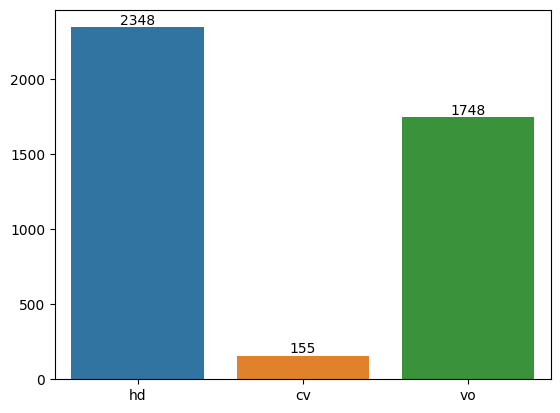

In [9]:

p = sb.barplot(x=df_sum.index, y = df_sum.values)
p.bar_label(p.containers[0])
plt.show()

In [21]:
df['hate'] = df['hd'] | df['cv'] | df['vo']
df['class'] = df['hate'].map({0:"Non-Hate", 1:"Hate"})
df_needed = df[['class', 'text', 'hate']].copy()
df_needed.head(5)

,class,text,hate
0,Non-Hate,He most likely converted to islam due to his n...,0
1,Non-Hate,So Ford lied about being a psychologist. Recor...,0
2,Non-Hate,Jobs. Education. Ending abuse of Nation. CA43.,0
3,Non-Hate,"I share a lot of your values, & like many who ...",0
4,Non-Hate,I am so ready to get back to blogging! www.ben...,0


In [16]:
df['hate'].value_counts()

hate
0    24169
1     3377
Name: count, dtype: int64

In [50]:
df_needed.to_csv(filepath+"data_needed.csv", index=False)

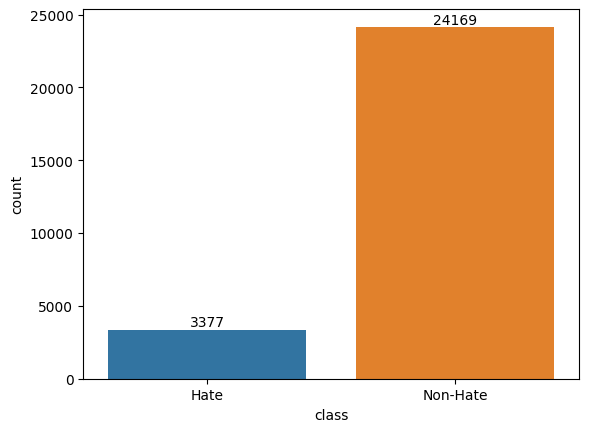

In [22]:
p = sb.countplot(x='class', data=df_needed, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

## SE2019-task-5


In [27]:
filepath = "Dataset/SE2019/"
df = pd.read_csv(filepath+"hateval2019_all.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      13000 non-null  int64 
 1   text    13000 non-null  object
 2   HS      13000 non-null  int64 
 3   TR      13000 non-null  int64 
 4   AG      13000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 507.9+ KB


In [28]:
df.head()

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0


In [29]:
df['HS'].value_counts()

HS
0    7530
1    5470
Name: count, dtype: int64

Extract text and HS column and save to csv file

HS column
- 0 = Non-Hate
- 1 = Hate

In [31]:
df['class'] = df['HS'].map({0:"Non-Hate", 1:"Hate"})
df['hate'] = df['class'].apply(lambda x: 1 if x =='Hate' else 0)

df_needed = df[['class', 'text', 'hate']].copy()
df_needed.head(5)

,class,text,hate
0,Hate,"Hurray, saving us $$$ in so many ways @potus @...",1
1,Hate,Why would young fighting age men be the vast m...,1
2,Hate,@KamalaHarris Illegals Dump their Kids at the ...,1
3,Non-Hate,NY Times: 'Nearly All White' States Pose 'an A...,0
4,Non-Hate,Orban in Brussels: European leaders are ignori...,0


In [34]:
df_needed.to_csv(filepath+"data_needed.csv", index=False)

Plot

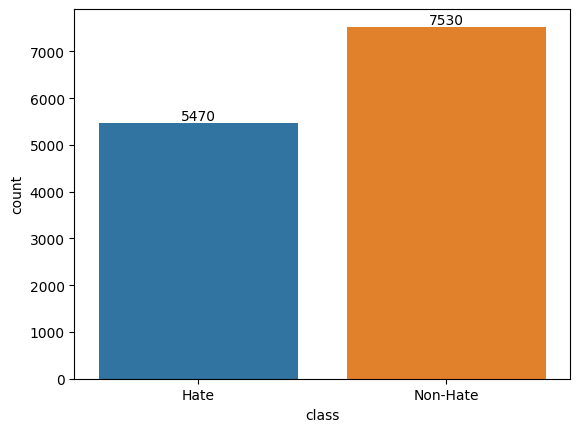

In [33]:
p = sb.countplot(x='class', data=df_needed, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

## Implicit hate

In [15]:
filepath = "Dataset/Implicit_hate_corpus/"
df = pd.read_csv(filepath+"implicit_hate_v1_stg1_posts.tsv", sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21480 entries, 0 to 21479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    21480 non-null  object
 1   label   21480 non-null  object
dtypes: object(2)
memory usage: 335.8+ KB


In [16]:
df['label'].value_counts()

label
not_hate         13291
implicit_hate     7100
explicit_hate     1089
Name: count, dtype: int64

In [17]:
df.head(10)

,post,label
0,""" : jewish harvard professor noel ignatiev w...",implicit_hate
1,b.higher education is a part of european cult...,not_hate
2,"has a problem with "" the whites "" "" and "" "" ...",not_hate
3,is yasir qadhi a hate preacher for calling ch...,not_hate
4,"rt "" : how three million germans mass murder...",not_hate
5,"rt "" we were murdered graffiti in synagogues...",not_hate
6,rt : tune in today's jmt for my interview w /...,implicit_hate
7,rt black supremacist arrested for threatening...,not_hate
8,rt crooked hillary you didn't lose because yo...,explicit_hate
9,"rt estonian pm : "" i don't want blacks in es...",explicit_hate


In [62]:
df['class'] = df['label'].map({"not_hate":"Non-Hate", "implicit_hate":"Hate", "explicit_hate":"Hate"})
df['hate'] = df['class'].map({"Hate":1, "Non-Hate":0})
df_needed = df[['class', 'post', 'hate']].copy()

In [74]:
df.sample(5)

,post,label,class,hate
5800,: we have very racist anti-white media usuall...,not_hate,Non-Hate,0
15159,here's the evil spawn of your hate . is this w...,not_hate,Non-Hate,0
5970,guns are a white invention . we used them to c...,implicit_hate,Hate,1
11594,iron heart book is now being translated into g...,not_hate,Non-Hate,0
15718,a white supremacist when they are conservativ...,not_hate,Non-Hate,0


In [76]:
df_needed.to_csv(filepath+"data_needed.csv", index=False)

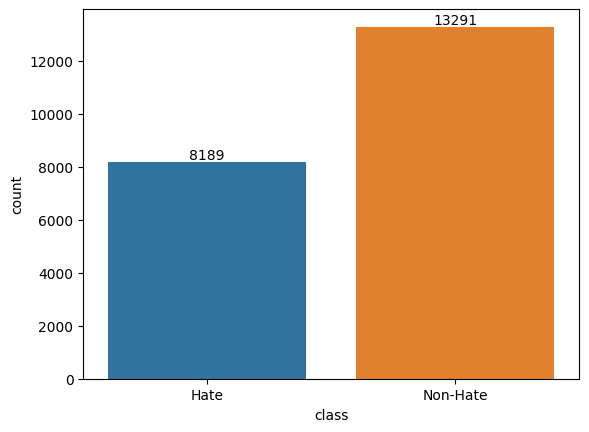

In [75]:
p = sb.countplot(x='class', data=df_needed, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

## Balanced

set to dataneeded here then clean below

In [56]:
filepath = "Dataset/"
dataset_option = "/data_needed.csv"
dataset_name = "GabHateCorpus"
df_gab = pd.read_csv(filepath+dataset_name+dataset_option)

dataset_name = "Implicit_hate_corpus"
df_implicit = pd.read_csv(filepath+dataset_name+dataset_option)

dataset_name = "SE2019"
df_se = pd.read_csv(filepath+dataset_name+dataset_option)


In [50]:
gab_count = df_gab['class'].value_counts()
implicit_count = df_implicit['class'].value_counts()
se_count = df_se['class'].value_counts()
print(gab_count)
print(implicit_count)
print(se_count)
sum = gab_count[1] + implicit_count[1] + se_count[1]
print()
print("total hate", sum)

class
Non-Hate    23800
Hate         3344
Name: count, dtype: int64
class
Non-Hate    13289
Hate         8189
Name: count, dtype: int64
class
Non-Hate    7512
Hate        5468
Name: count, dtype: int64

total 17001


In [51]:
def get_equal(df):
    df_hate = df[df['class']=='Hate'] 
    n = len(df_hate)
    df_non_hate = df[df['class'] == 'Non-Hate'].sample(n, random_state = 42)
    return pd.concat([df_hate,df_non_hate]).sample(n*2)

In [52]:
df_gab1 = get_equal(df_gab)
df_implicit1 = get_equal(df_implicit)
df_se1 = get_equal(df_se)

In [53]:
df_all = pd.concat([df_gab1, df_implicit1, df_se1])
df_all['class'].value_counts()

class
Non-Hate    17001
Hate        17001
Name: count, dtype: int64

In [54]:
df_all.to_csv("Dataset/Balanced/data_needed2.csv", index=False)

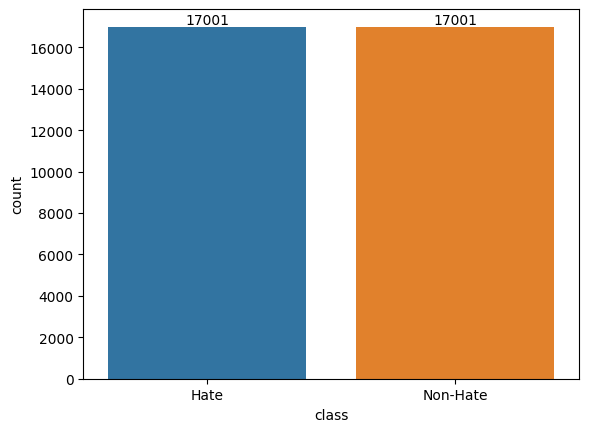

In [55]:
p = sb.countplot(x='class', data=df_all, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

# Text preprocessing

In [2]:
import emoji

Initial data cleaning requirements that we can think of after looking at the top 5 records:

- The Twitter handles are already masked as @user due to privacy concerns. So, these Twitter handles are hardly giving any information about the nature of the tweet.
We can also think of getting rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different kinds of tweets.
Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.
Once we have executed the above three steps, we can split every tweet into individual words or tokens which is an essential step in any NLP task.
In the 4th tweet, there is a word ‘love’. We might also have terms like loves, loving, lovable, etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘love’, then we can reduce the total number of unique words in our data without losing a significant amount of information
- Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

- todo: talk about before and after cleaning words count 
- all data obtained had to be stripped of all non text content including emoji, html and extra whitespace. ensure only content analyzing the text of the posts and not falesly identify certain emoji or html as hate speech

In [3]:
def clean(text):
    text = str(text).lower()
    text = emoji.replace_emoji(text) # remove emoji
    text = re.sub('@[\w]*', '', text) #remove tweeter handler
    text = re.sub('\[.*?\]', '', text) # remove puncuation??
    text = re.sub('https?://\S+|www\.\S+', '', text) #replace URL
    text = re.sub('<.*?>+', '', text) # temove anything in the <>
    text = re.sub("[^a-zA-Z ]", "", text) #remove punctuation, number, special character,keep hash ("[^a-zA-Z# ]", "", text)
    text = re.sub('\n', '', text) #remove line break
    text = re.sub('\w*\d\w*', '', text) # not sure
    text = re.sub(r'\s+', ' ', text) #remove multiple spaces
    # if stopw:
    #     text = [word for word in text.split(' ') if word not in stopword]
    #     text = " ".join(text)
    return text

def stem(text):
    text = text.split()
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

In [54]:
text = "#addddsdf @asdf"
clean(text)

'addddsdf '

In [35]:
emoji.demojize("Good morning, Jim. Happy Friday my friend 👍")

'Good morning, Jim. Happy Friday my friend :thumbs_up:'

In [47]:
filepath = "Dataset/Balanced/"
df = pd.read_csv(filepath+"data_needed.csv")
df.head()

,class,text,hate
0,Hate,We're going to bring it to these kikes that th...,1
1,Hate,You sure that’s not a tranny ?,1
2,Non-Hate,The 'Doc' wants to force medicate the baby via...,0
3,Hate,Hunted online like an animal... peak faggotry.,1
4,Non-Hate,"Yeah, lol! Maybe they'll send barry over there...",0


In [48]:
# clean
df['text'] = df['text'].apply(clean)
df.head(6)

,class,text,hate
0,Hate,were going to bring it to these kikes that the...,1
1,Hate,you sure thats not a tranny,1
2,Non-Hate,the doc wants to force medicate the baby via b...,0
3,Hate,hunted online like an animal peak faggotry,1
4,Non-Hate,yeah lol maybe theyll send barry over there fo...,0
5,Non-Hate,helping to make america great again,0


In [52]:
df[df['text'] == " "], df[df['text'] == ""]

(Empty DataFrame
 Columns: [class, text, hate]
 Index: [],
 Empty DataFrame
 Columns: [class, text, hate]
 Index: [])

In [50]:
print(df['class'].value_counts())
df = df[df['text'] != ""]
df = df[df['text'] != " "]
print(df['class'].value_counts())

class
Hate        17036
Non-Hate    17036
Name: count, dtype: int64
class
Hate        17001
Non-Hate    16972
Name: count, dtype: int64


In [51]:
# save to csv
filename = "data_processed2.csv"
df.to_csv(filepath+filename, index=False)

In [86]:
# clean and stem
df['text'] = df['text'].apply(stem)
df.head(5)

,class,text,hate
0,Hate,jewish harvard professor noel ignatiev want ab...,1
1,Non-Hate,bhigher educ part european cultur import conti...,0
2,Non-Hate,problem white christian go ahead free say,0
3,Non-Hate,yasir qadhi hate preacher call christian filth...,0
4,Non-Hate,rt three million german mass murder destruct r...,0


In [87]:
# save to csv
filename = "data_stemmed.csv"
df.to_csv(filepath+filename, index=False)

# visualization

In [31]:
filepath = "Dataset/Implicit_hate_corpus/"
df = pd.read_csv(filepath+"data_processed.csv")

In [25]:
df.head()

,class,text,hate
0,Non-Hate,feminsts sjws gets owned cringe compilation co...,0
1,Hate,hey fellow whites sit let lecture terrible,1
2,Non-Hate,evolved potential currency asset soon become r...,0
3,Hate,mil milstalin milhitler milmao milpolpot miln ...,1
4,Hate,liberalism mental disorder much dangerous thou...,1


Common word

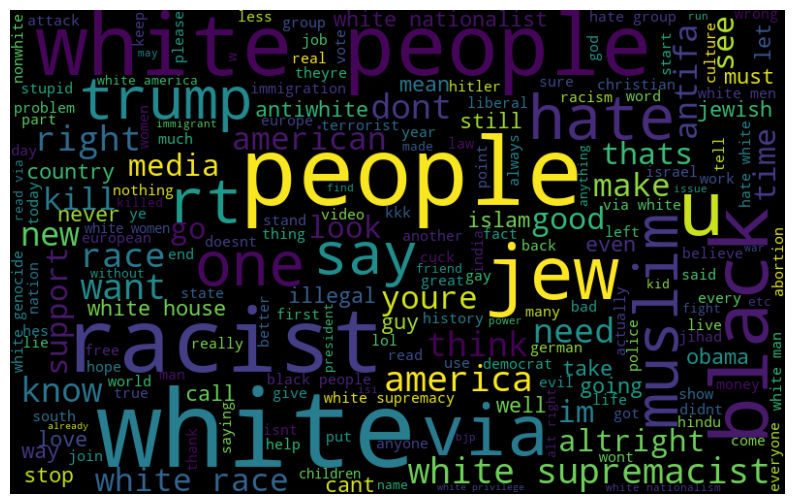

In [32]:
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common word in non hate

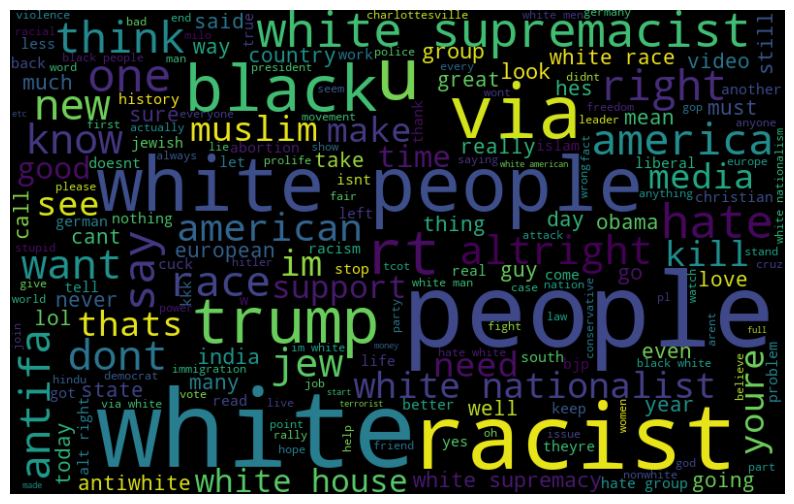

In [33]:
words =' '.join([text for text in df['text'][df['hate'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common word in hate

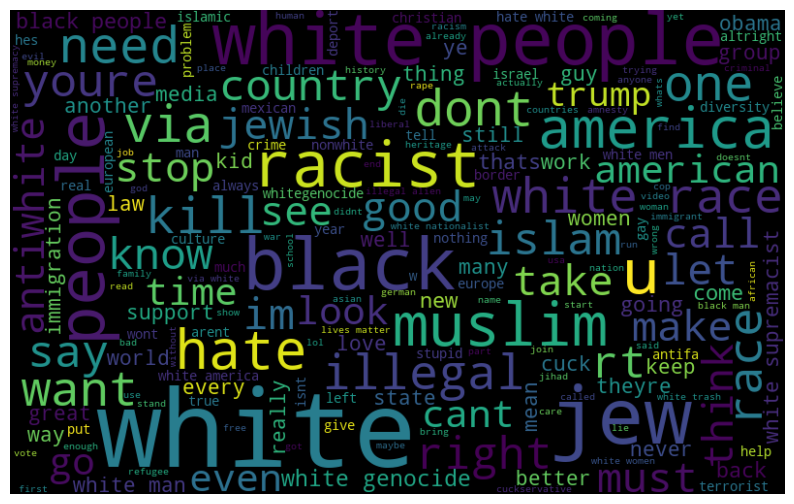

In [34]:
words =' '.join([text for text in df['text'][df['hate'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## understanding hashtag

In [ ]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# use havent processed data so word not edited 
ht_nonhate = hashtag_extract(df['text'][df["hate"]==0])
ht_hate = hashtag_extract(df['text'][df['hate']==1])

In [ ]:
# 2d to 1d array
ht_nonhate = sum(ht_nonhate, [])
ht_hate = sum(ht_hate, [])


barchart for common word for hashtag
- As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

In [ ]:
a = nltk.FreqDist(ht_nonhate)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sb.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


In [ ]:
a = nltk.FreqDist(ht_hate)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sb.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


- https://www.youtube.com/watch?v=JvFrJacbt6U